In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

#bone image with epidural
img_bone_1 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/049/bone/14.jpg', cv2.IMREAD_GRAYSCALE)

#brain image with epidural
img_brain_1 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/049/brain/14.jpg', cv2.IMREAD_GRAYSCALE)

#bone image with fracture
img_bone_2 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/050/bone/18.jpg', cv2.IMREAD_GRAYSCALE)

#brain image with Intraparenchymal
img_brain_2 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/050/brain/18.jpg', cv2.IMREAD_GRAYSCALE)

#bone image for no fracture
img_bone_3 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/060/bone/2.jpg', cv2.IMREAD_GRAYSCALE)

#brain image for no hemorrhage
img_brain_3 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/060/brain/2.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
img_bone_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

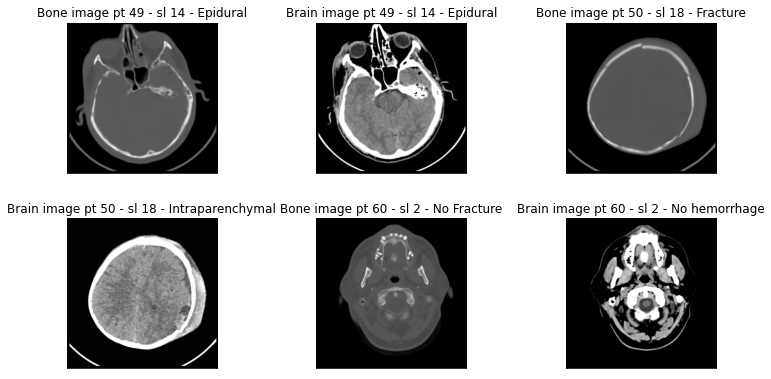

In [ ]:
# affichage des images côte à côte
fig = plt.figure(figsize = (12,12))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.5,
                    wspace=0.3,
                    hspace=0.3)

fig.add_subplot(2,3,1)

plt.imshow(img_bone_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Bone image pt 49 - sl 14 - Epidural')

fig.add_subplot(2,3,2)

plt.imshow(img_brain_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Brain image pt 49 - sl 14 - Epidural')

fig.add_subplot(2,3,3)

plt.imshow(img_bone_2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Bone image pt 50 - sl 18 - Fracture')

fig.add_subplot(2,3,4)

plt.imshow(img_brain_2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Brain image pt 50 - sl 18 - Intraparenchymal')

fig.add_subplot(2,3,5)

plt.imshow(img_bone_3, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Bone image pt 60 - sl 2 - No Fracture')

fig.add_subplot(2,3,6)

plt.imshow(img_brain_3, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Brain image pt 60 - sl 2 - No hemorrhage')

plt.show();

Paires de coupe (cerveau et crâne) sur 3 patients différents, représentant une respectivement une hémorragie épidurale, une fracture avec hémorragie intraparenchymal et une radiographie saine, sans fracture ni hémorragie

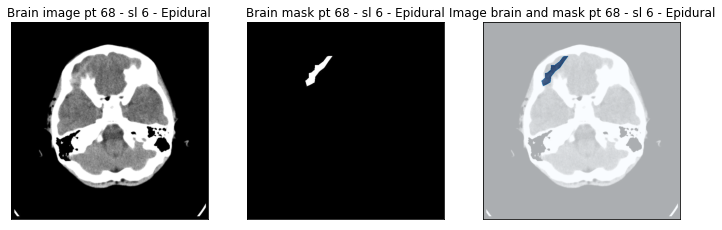

In [ ]:
# affichage image avec masque de segmentation - patient 66
pt66_1 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/068/brain/6.jpg', cv2.IMREAD_GRAYSCALE)
pt66_2 = cv2.imread('Documents/projet-hemorragie/data-source/Patients_CT/068/brain/6_HGE_Seg.jpg', cv2.IMREAD_GRAYSCALE)

# affichage des images côte à côte
fig = plt.figure(figsize = (12,12))

fig.add_subplot(1,3,1)
plt.imshow(pt66_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Brain image pt 68 - sl 6 - Epidural')

fig.add_subplot(1,3,2)
plt.imshow(pt66_2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.title('Brain mask pt 68 - sl 6 - Epidural')

plt.subplot(1,3,3)
plt.imshow(pt66_1, cmap='gray')
plt.imshow(pt66_2, cmap='Blues', alpha=0.7)
plt.xticks([])
plt.yticks([])
plt.title('Image brain and mask pt 68 - sl 6 - Epidural')

plt.show();


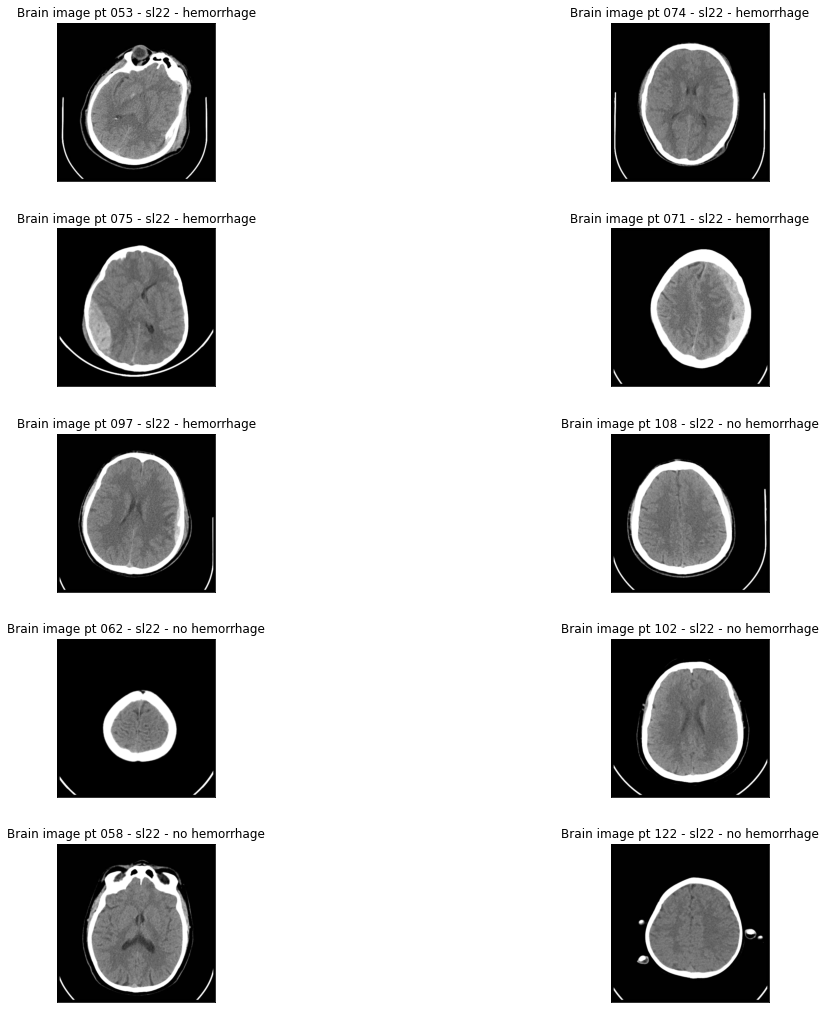

In [ ]:
#hemorrhage vs non hemorrahge
hemo = pd.read_csv('Documents/projet-hemorragie/data-source/hemorrhage_diagnosis.csv')

def display_img(slice_nb):    
    # comparaison sur une slice comparable pour chaque patient
    df = hemo[hemo['SliceNumber'] == slice_nb]
    has_hemo = df[df['No_Hemorrhage'] == 0].sample(n=5)
    no_hemo = df[df['No_Hemorrhage'] == 1].sample(n=5)
    analysis = pd.concat([has_hemo,no_hemo])
    analysis = analysis.reset_index()
    
    fig = plt.figure(figsize = (17,17))
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
    
    for index, row in analysis.iterrows():
        fig.add_subplot(5,2,index+1)
        #ajout du 0 pour les chiffres < 100
        if row['PatientNumber'] < 100:
            pt_number = '0'+ str(row['PatientNumber'])
        else:
            pt_number = str(row['PatientNumber'])
        if (row['No_Hemorrhage'] == 0):
            hemorrhage = 'hemorrhage'
        else: 
            hemorrhage = 'no hemorrhage'
        url = 'Documents/projet-hemorragie/data-source/Patients_CT/'+ pt_number +'/brain/22.jpg'
        pt_irm = cv2.imread(url, cv2.IMREAD_GRAYSCALE)
        plt.imshow(pt_irm, cmap = 'gray')
        plt.xticks([])
        plt.yticks([])
        title_img = 'Brain image pt ' + pt_number + ' - sl' + str(slice_nb) +' - '+ hemorrhage
        plt.title(title_img)

#choose the slice
display_img(22)    

plt.show();

[ WARN:0@1329.124] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('Documents/projet-hemorragie/data-source/Patients_CT/084/bone/36.jpg'): can't open/read file: check file path/integrity
/var/folders/3x/y808qnvx05b8ltx93dljcmch0000gn/T/ipykernel_1197/3656499917.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_bone = np.array(X_bone)


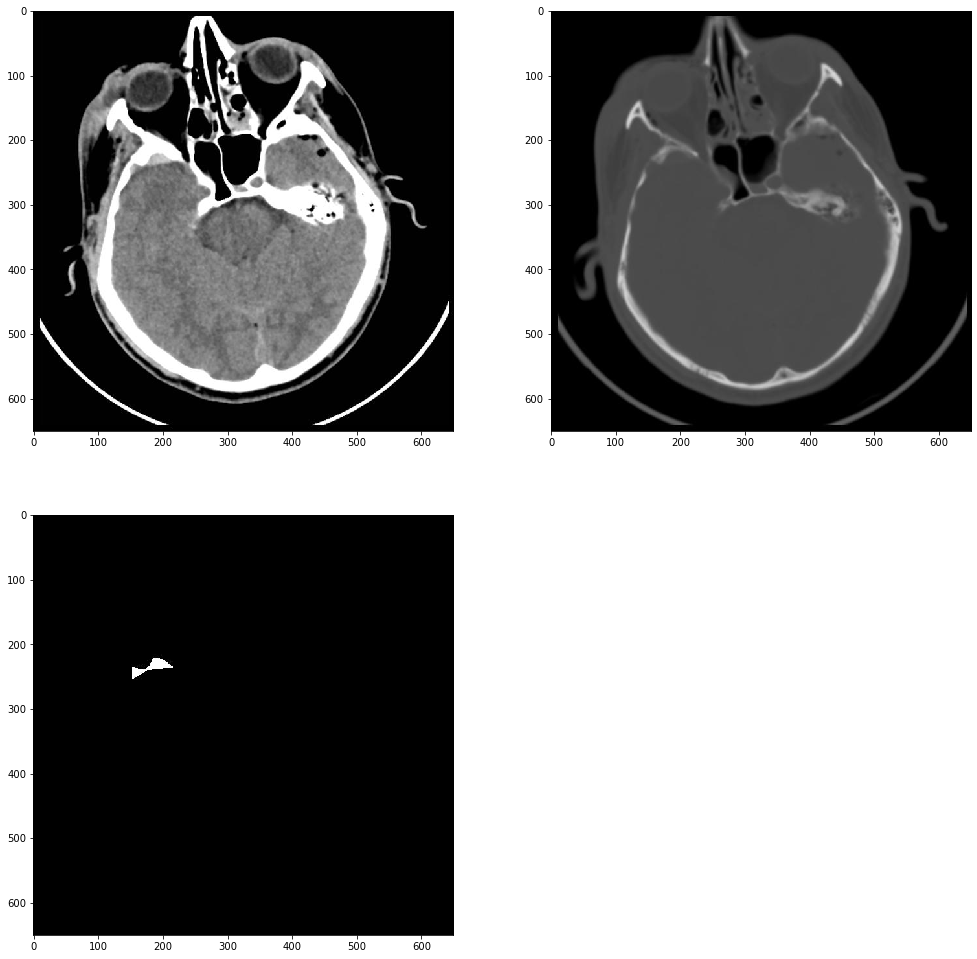

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

#data source
hemo = pd.read_csv('Documents/projet-hemorragie/data-source/hemorrhage_diagnosis.csv')

#regrouper toutes les images dans des vecteurs X_brain et y_brain, X_bone et y_bone
X_brain = []
y_brain= []
X_bone= []
y_bone= []
X_mask = []
y_intraventricular = []
y_intraparenchymal = []
y_subarachnoid = []
y_epidural = []
y_subdural = []

for index, row in hemo.iterrows():
    
    slice_num = str(row.SliceNumber)
    
    if (row['Fracture_Yes_No'] == 1):
        y_bone.append(1)
    else:
        y_bone.append(0)
    
    if row['PatientNumber'] < 100:
        pt_number = '0'+ str(row['PatientNumber'])
    else:
        pt_number = str(row['PatientNumber'])
    
    if (row['No_Hemorrhage'] == 0):
        y_brain.append(1)
        file_mask = 'Documents/projet-hemorragie/data-source/Patients_CT/'+ pt_number + '/brain/' + slice_num +'_HGE_Seg.jpg'
        img_mask = cv2.imread(file_mask, cv2.IMREAD_GRAYSCALE)
        X_mask.append(img_mask)
    else:
        y_brain.append(0)
        img_mask = np.zeros((650,650), np.uint8)
        X_mask.append(img_mask)
        
    # create y for each type of hemorrhage
    if (row.Intraventricular == 1):
        y_intraventricular.append(1)
    else:
        y_intraventricular.append(0)
    
    if (row.Intraparenchymal == 1):
        y_intraparenchymal.append(1)
    else:
        y_intraparenchymal.append(0)
    
    if (row.Subarachnoid == 1):
        y_subarachnoid.append(1)
    else:
        y_subarachnoid.append(0)
        
    if (row.Epidural == 1):
        y_epidural.append(1)
    else:
        y_epidural.append(0)
        
    if (row.Subdural == 1):
        y_subdural.append(1)
    else:
        y_subdural.append(0)
        
    file_brain = 'Documents/projet-hemorragie/data-source/Patients_CT/'+ pt_number + '/brain/' + slice_num +'.jpg'
    file_bone = 'Documents/projet-hemorragie/data-source/Patients_CT/'+ pt_number + '/bone/' + slice_num +'.jpg'
    img_brain = cv2.imread(file_brain)
    img_bone = cv2.imread(file_bone)
    X_brain.append(img_brain)
    X_bone.append(img_bone)
    
X_brain = np.array(X_brain)
X_bone = np.array(X_bone)
X_mask = np.array(X_mask)
y_brain = np.array(y_brain)
y_bone = np.array(y_bone)
y_intraventricular = np.array(y_intraventricular)
y_intraparenchymal = np.array(y_intraparenchymal)
y_subarachnoid = np.array(y_subarachnoid)
y_epidural = np.array(y_epidural)
y_subdural = np.array(y_subdural)


#Binary data
np.save('X_brain.npy', X_brain)

#function to display img according to patient number and slice number
def display_radio(pt_number, slice_number):
    index = int(np.where((hemo['PatientNumber'] == pt_number) & (hemo['SliceNumber'] == slice_number))[0])
    fig = plt.figure(figsize = (17,17))
    fig.add_subplot(2,2,1)
    plt.imshow(X_brain[index], cmap='gray', interpolation='None')
    fig.add_subplot(2,2,2)
    plt.imshow(X_bone[index], cmap='gray', interpolation='None')
    fig.add_subplot(2,2,3)
    plt.imshow(X_mask[index], cmap='gray', interpolation='None') 
    
display_radio(49, 14)

In [ ]:
X_brain.shape

(2501, 650, 650, 3)

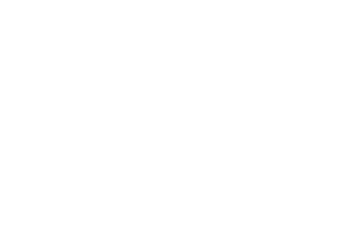

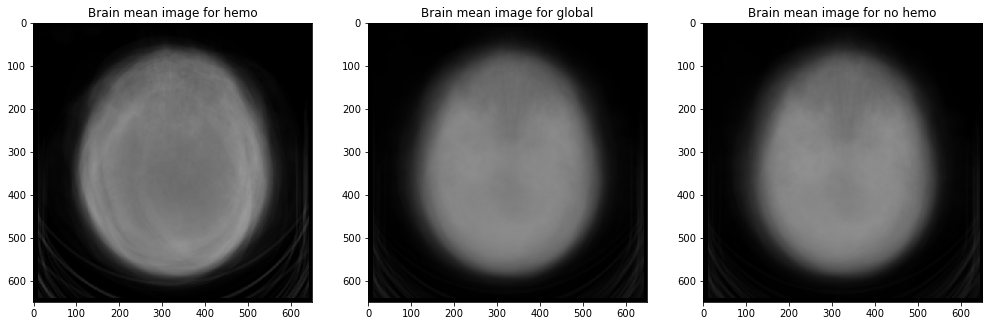

In [ ]:
#calcul de l'image moyenne pour hemorragie et au global

from matplotlib import cm

# image mean for hemo
img_hemo = X_brain[y_brain == 1].mean(axis=0)/255
    
# image mean for global
img_global = X_brain.mean(axis=0)/255

#image mean for no hemo
img_nohemo = X_brain[y_brain == 0].mean(axis=0)/255
    
plt.axis('off')

fig = plt.figure(figsize = (17,17))
fig.add_subplot(1,3,1)
plt.imshow(img_hemo, cmap=cm.binary, interpolation='None')
plt.title('Brain mean image for hemo')

fig.add_subplot(1,3,2)
plt.imshow(img_global, cmap=cm.binary, interpolation='None')
plt.title('Brain mean image for global')

fig.add_subplot(1,3,3)
plt.imshow(img_nohemo, cmap=cm.binary, interpolation='None')
plt.title('Brain mean image for no hemo')

plt.show();

# le cerveau est en moyenne, plutôt centré

Nous avons réalisé la moyenne des images des coupes du cerveau pour les hémorragies, les non-hémorragies et au gloabl (incluant toutes les coupes). Ce que l'on constate c'est que le cerveau est en moyenne plutôt centré sur l'image.
Il y a en tout 318 thomographies hémorragiques, pour 2501 coupes au total. Ces thomographies sont réalisées sur 82 patients. Chez un patient présentant une hémorragie, cette dernière peut être visualisée sur plusieurs coupes de son cerveau. Les thomographies présentant une hémorragie concernent donc 13% des thomographies totales.
Il y a en moyenne 30 coupes par patient.

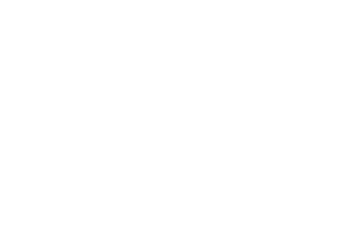

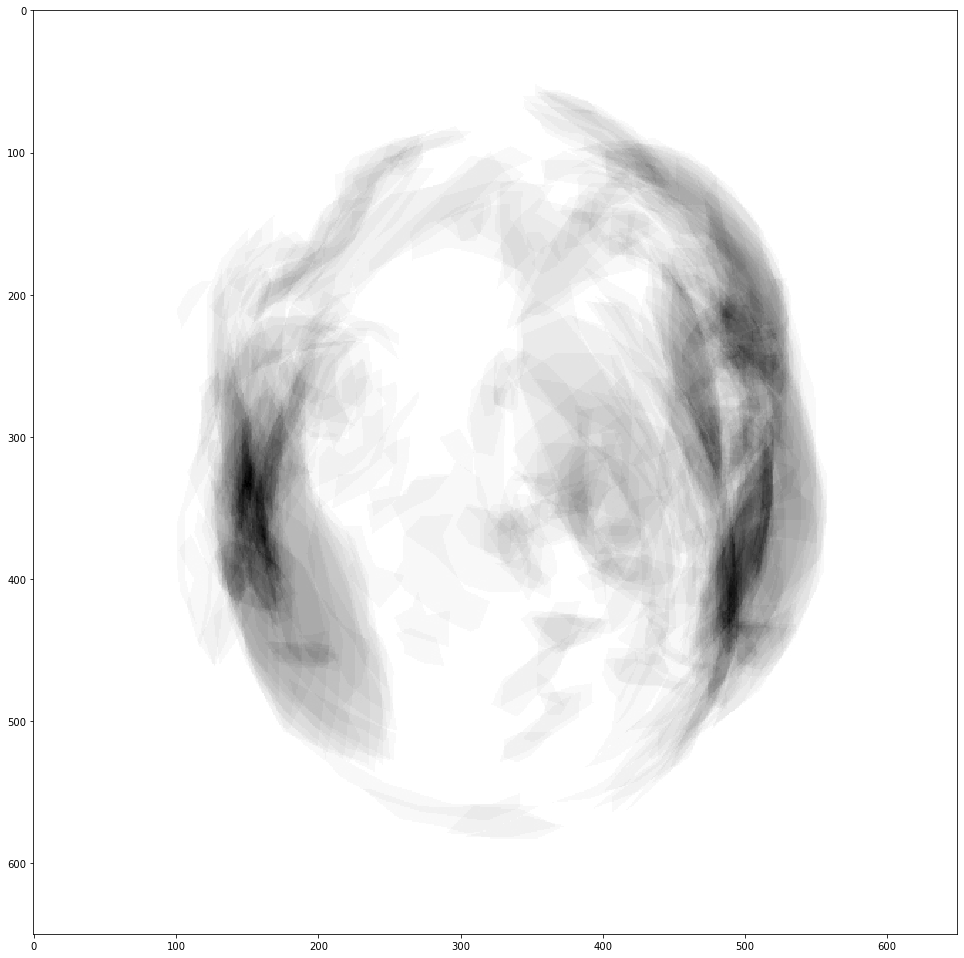

In [ ]:
#calcul du masque moyen en presence d'une hemorragie
from matplotlib import cm

# image mean for mask
mean_mask = X_mask[y_brain == 1].mean(axis=0)/255
    
plt.axis('off')

fig = plt.figure(figsize = (17,17))
plt.imshow(mean_mask, cmap=cm.binary, interpolation='None');

La représentation de la moyenne des thomographies avec présence d'hémorragie nous montre que la plupart des hémorragies constatées se situent des deux côtés du cerveau (zones plus sombres)

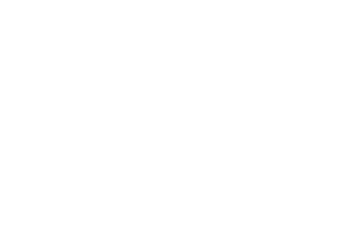

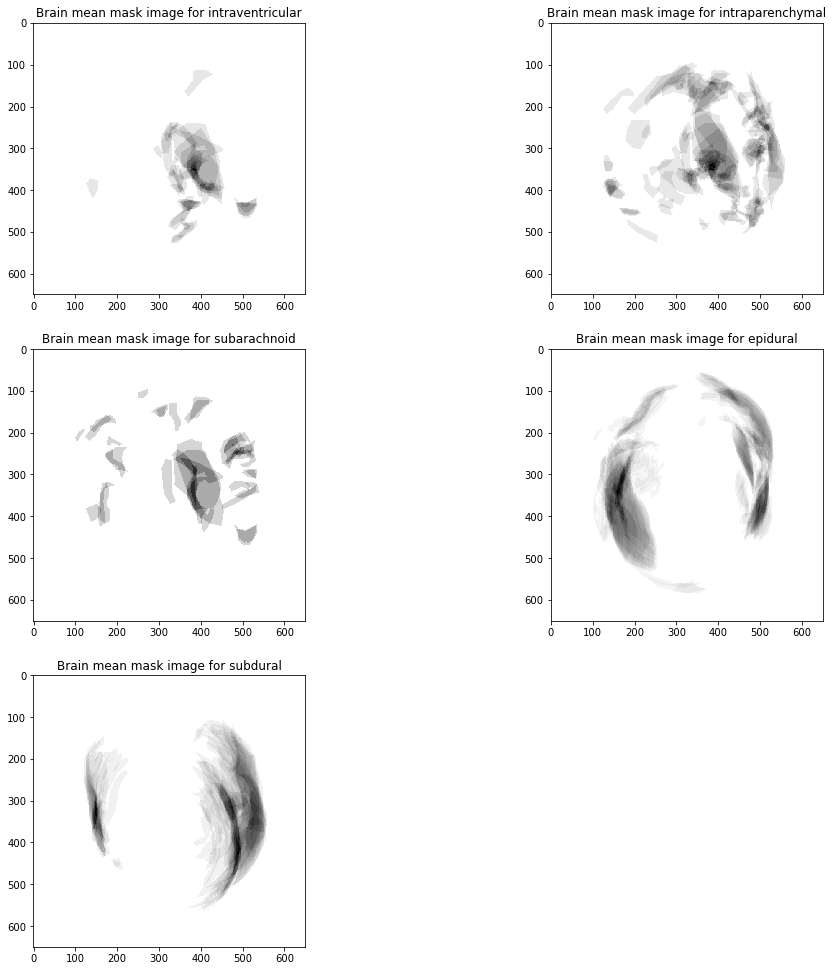

In [ ]:
#calcul du masque moyen par type d'hemorragie

y_intraventricular = np.array(y_intraventricular)
y_intraparenchymal = np.array(y_intraparenchymal)
y_subarachnoid = np.array(y_subarachnoid)
y_epidural = np.array(y_epidural)
y_subdural = np.array(y_subdural)

# image mean for mask by type
mean_mask_intraventricular = X_mask[y_intraventricular == 1].mean(axis=0)/255
mean_mask_intraparenchymal = X_mask[y_intraparenchymal == 1].mean(axis=0)/255
mean_mask_subarachnoid = X_mask[y_subarachnoid == 1].mean(axis=0)/255
mean_mask_epidural = X_mask[y_epidural == 1].mean(axis=0)/255
mean_mask_subdural = X_mask[y_subdural == 1].mean(axis=0)/255

plt.axis('off')

fig = plt.figure(figsize = (17,17))

fig.add_subplot(3,2,1)
plt.imshow(mean_mask_intraventricular, cmap=cm.binary, interpolation='None')
plt.title('Brain mean mask image for intraventricular')

fig.add_subplot(3,2,2)
plt.imshow(mean_mask_intraparenchymal, cmap=cm.binary, interpolation='None')
plt.title('Brain mean mask image for intraparenchymal')

fig.add_subplot(3,2,3)
plt.imshow(mean_mask_subarachnoid, cmap=cm.binary, interpolation='None')
plt.title('Brain mean mask image for subarachnoid')

fig.add_subplot(3,2,4)
plt.imshow(mean_mask_epidural, cmap=cm.binary, interpolation='None')
plt.title('Brain mean mask image for epidural')

fig.add_subplot(3,2,5)
plt.imshow(mean_mask_subdural, cmap=cm.binary, interpolation='None')
plt.title('Brain mean mask image for subdural')


plt.show();

Les moyennes par type d'hémorragie permettent d'avoir une représentation un peu plus clair des zones où elles sont localisées (hémorragie correspondant à une zone délimitée du cerveau).

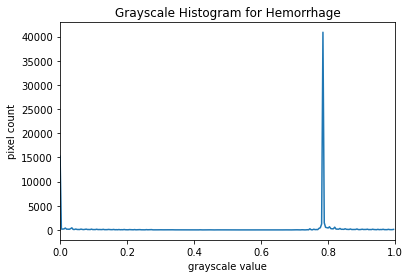

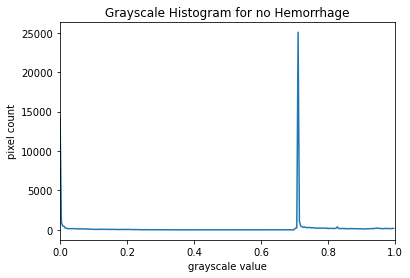

In [ ]:
# distribution des couleurs en fonction de présence ou non d'hémorragie

#create the histogram
histogram_hemo, bin_hemo = np.histogram(img_hemo, bins=256, range=(0, 1))
histogram_nohemo, bin_nohemo = np.histogram(img_nohemo, bins=256, range=(0, 1))

# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram for Hemorrhage")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  

plt.plot(bin_hemo[0:-1], histogram_hemo)


# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram for no Hemorrhage")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  

plt.plot(bin_nohemo[0:-1], histogram_nohemo)

plt.show();

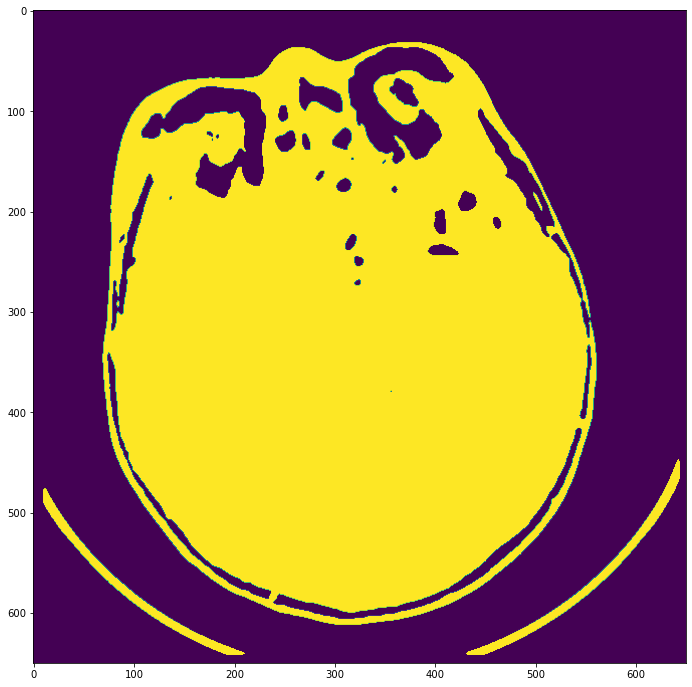

In [ ]:
#convex hull
src = X_brain[16]

#binarize the image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
blur = cv2.blur(blur, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize = (12,12))
plt.imshow(thresh);

In [ ]:
# Finding contours for the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create hull array for convex hull points
hull = []

# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

In [ ]:
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(drawing, hull, i, color, 1, 8)

In [ ]:
#Visualize on 2 dimension
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [ ]:
X_brain.shape
a = X_brain[...,0]
#ou means avec -1
a = a.reshape(-1,650*650)
a.shape

(2501, 422500)

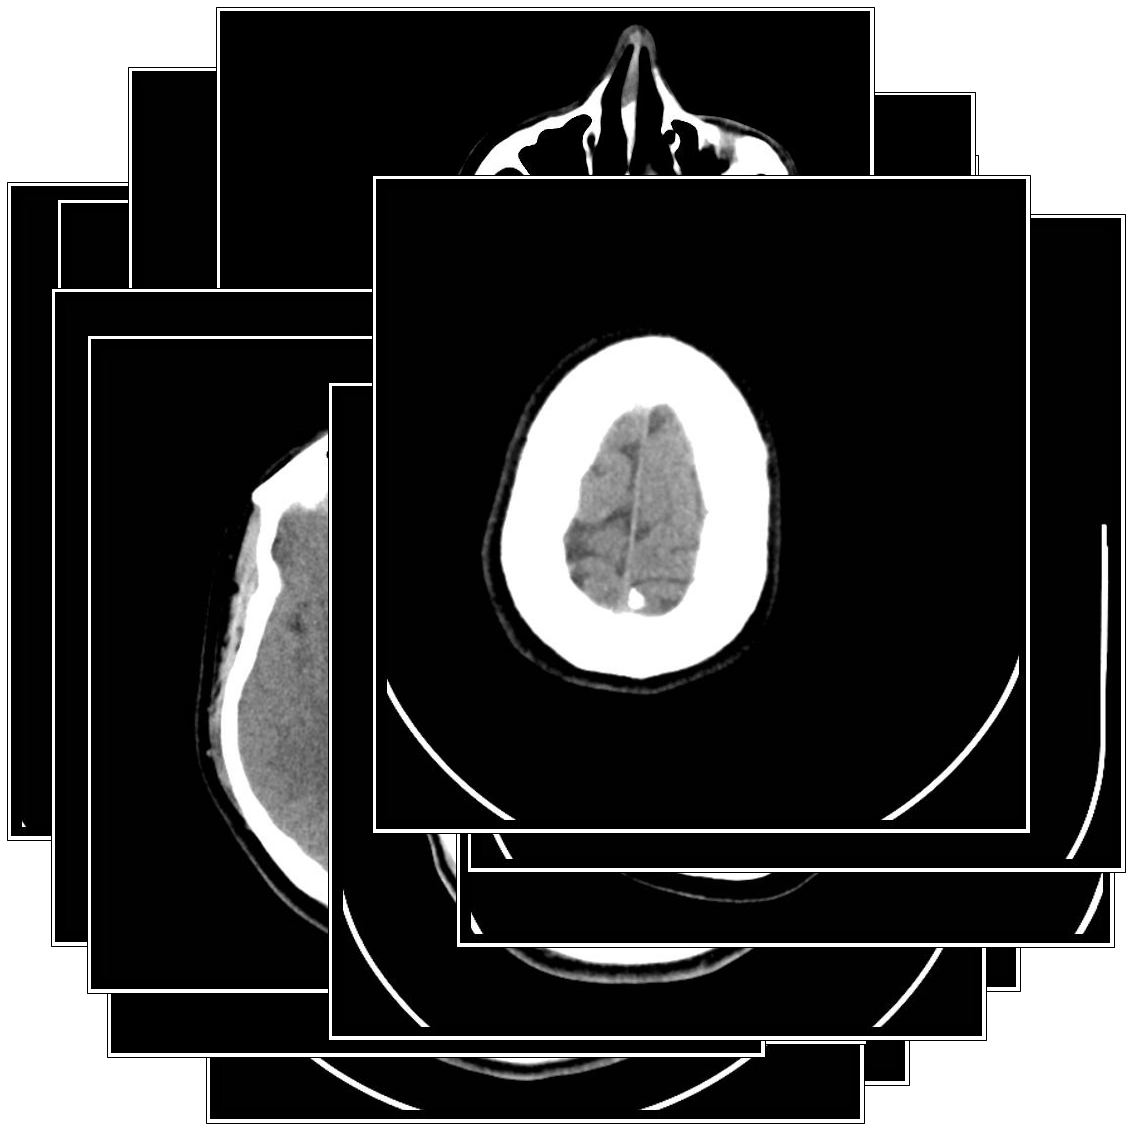

In [ ]:
from sklearn.manifold import Isomap
from matplotlib import offsetbox

fig, ax = plt.subplots(figsize=(10, 10))

plot_components(a,
                model=Isomap(n_components=2),
                images=X_brain,
                cmap = 'gray',
                thumb_frac = .1)